📥 **Importing the Necessary Libraries**

In this step, we import essential Python libraries that will be used throughout the project:

- `pandas` (pd) for loading and manipulating tabular data.

- `numpy` (np) for numerical operations and handling arrays.

- `matplotlib.pyplot` (plt) for creating static visualizations like line plots and scatter plots.

- `seaborn` (sns) for enhanced and attractive data visualizations.

These libraries form the foundation for data analysis, visualization, and preprocessing activities later in the project.

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔗 **Mounting Google Drive in Google Colab**

In this step, we connect our Google Drive storage to the Colab environment:

`from google.colab import drive` imports the necessary module to handle the mounting.

`drive.mount('/content/drive')` mounts the entire Google Drive into the Colab's file system at the `/content/drive` path.

This allows seamless access, loading, and saving of files (such as datasets, models, and outputs) between your Drive and Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📄 **Reading the Dataset and Checking Initial Shape**

In this step, we read the hospital discharge dataset from Google Drive into a Pandas DataFrame:

`df = pd.read_csv('/content/drive/MyDrive/Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250426 (1).csv')` loads the CSV file into a DataFrame called `df`, allowing for structured data manipulation.

`print(df.shape)` outputs the shape of the DataFrame, displaying the number of rows and columns to give a quick understanding of the dataset size.

This verification step ensures that the dataset has been loaded correctly before proceeding with further exploration and analysis.

In [3]:
# The full path
df = pd.read_csv('/content/drive/MyDrive/Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250426 (1).csv')

# Viewing shape
print(df.shape)

(1192827, 14)


📊 **Inspecting the Dataset Shape in Detail**

In this step, we perform a deeper check of the dataset's structure:

`print("Shape of dataset:", df.shape)` prints the overall shape of the DataFrame as a tuple (rows, columns).

`print("Number of rows:", df.shape[0])` specifically prints the total number of rows (records) in the dataset.

`print("Number of columns:", df.shape[1])` specifically prints the total number of columns (features) in the dataset.

This breakdown helps in understanding the dataset dimensions clearly before moving forward with data exploration and preprocessing.

In [4]:
# Checking the shape
print("Shape of dataset:", df.shape)

# Specifically print number of rows
print("Number of rows:", df.shape[0])

# And number of columns
print("Number of columns:", df.shape[1])

Shape of dataset: (1192827, 14)
Number of rows: 1192827
Number of columns: 14


📋 **Exploring Dataset Structure, Statistics, and Missing Values**

In this step, we explore the dataset to better understand its structure and contents:

`df.info()` displays the column names, data types, and non-null counts for each column, helping identify the types of data we are working with.

`df.describe()` provides basic statistical summaries (mean, median, min, max, standard deviation) for all numeric columns, giving insights into data distribution.

`df.isnull().sum()` calculates the number of missing (null) values in each column, allowing us to quickly detect incomplete or problematic data that may need cleaning.

This exploration step is essential to guide further preprocessing decisions and model-building strategies.

In [5]:
# Check column names and data types
df.info()

# See basic statistics
df.describe()

# See missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192827 entries, 0 to 1192826
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   Year                                 1192827 non-null  int64 
 1   Facility Id                          1192827 non-null  int64 
 2   Facility Name                        1192827 non-null  object
 3   APR DRG Code                         1192827 non-null  int64 
 4   APR Severity of Illness Code         1192827 non-null  int64 
 5   APR DRG Description                  1192827 non-null  object
 6   APR Severity of Illness Description  1192617 non-null  object
 7   APR Medical Surgical Code            1192348 non-null  object
 8   APR Medical Surgical Description     1192827 non-null  object
 9   Discharges                           1192827 non-null  object
 10  Mean Charge                          1192827 non-null  object
 11  Median Char

,0
Year,0
Facility Id,0
Facility Name,0
APR DRG Code,0
APR Severity of Illness Code,0
APR DRG Description,0
APR Severity of Illness Description,210
APR Medical Surgical Code,479
APR Medical Surgical Description,0
Discharges,0


🧹 **Cleaning Column Names for Consistency**

In this step, we standardize the column names in the dataset to make them easier to work with:

`df.columns.str.strip()` removes any leading or trailing whitespace from the column names.

`.str.lower()` converts all column names to lowercase to maintain uniformity and avoid case sensitivity issues.

`.str.replace(' ', '_')` replaces any spaces with underscores, making the names more coding-friendly.

Finally, `df.head(2)` displays the first two rows of the DataFrame to verify that the column names have been successfully cleaned and standardized.

This ensures that the dataset is properly structured for the next stages of data preprocessing and modeling.

In [6]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(2)

,year,facility_id,facility_name,apr_drg_code,apr_severity_of_illness_code,apr_drg_description,apr_severity_of_illness_description,apr_medical_surgical_code,apr_medical_surgical_description,discharges,mean_charge,median_charge,mean_cost,median_cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,"8,375.41","8,375.41","3,585.05","3,585.05"
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,"14,029.82","12,176.95","6,182.67","5,253.15"


🔢 **Converting Cost and Charge Columns to Numeric Format**

In this step, we ensure that the financial and discharge-related columns are correctly formatted as numeric data types:

We define `cols_to_numeric` containing the column names that should be numeric: `'discharges'`, `'mean_charge'`, `'median_charge'`, `'mean_cost'`, and `'median_cost'`.

For each column:

`.astype(str)` first converts all values to string to ensure uniform processing.

`.str.replace(',', '')` removes any commas that were used as thousands separators.

`.str.replace('$', '')` removes dollar signs from the monetary columns.

`.astype(float)` finally converts the cleaned string values into proper floating-point numbers.

This cleaning is crucial to allow proper mathematical operations and modeling later in the project.

In [7]:
# Converting cost and charge columns to numeric
cols_to_numeric = ['discharges', 'mean_charge', 'median_charge', 'mean_cost', 'median_cost']


# Forcing columns to string first, then remove commas/dollar signs, then converting to float
for col in cols_to_numeric:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

🔍 **Rechecking for Missing Values After Cleaning**

In this step, we verify whether any missing (null) values still exist in the dataset after cleaning:

`df.isnull().sum()` checks each column and returns the total number of missing entries.

This confirmation ensures that our dataset is fully prepared for the next steps, such as model training, without encountering issues related to incomplete data.

In [8]:
# Checking again for missing values
df.isnull().sum()

,0
year,0
facility_id,0
facility_name,0
apr_drg_code,0
apr_severity_of_illness_code,0
apr_drg_description,0
apr_severity_of_illness_description,210
apr_medical_surgical_code,479
apr_medical_surgical_description,0
discharges,0


🧹 **Removing Remaining Missing Values and Final Verification**

In this step, we eliminate any remaining rows that contain missing (null) values:

`df = df.dropna()` removes all rows from the dataset that have at least one missing value, ensuring a completely clean dataset.

After dropping:

`print(df.shape)` displays the new shape of the dataset, helping us verify how many rows and columns remain.

`df.isnull().sum()` confirms that there are now zero missing values across all columns.

This step guarantees that the dataset is fully clean and ready for reliable model training.

In [9]:
df = df.dropna()

# Checking again
print(df.shape)
df.isnull().sum()

(1192348, 14)


,0
year,0
facility_id,0
facility_name,0
apr_drg_code,0
apr_severity_of_illness_code,0
apr_drg_description,0
apr_severity_of_illness_description,0
apr_medical_surgical_code,0
apr_medical_surgical_description,0
discharges,0


📊 **Checking the Final Shape of the Cleaned Dataset**

In this step, we confirm the dimensions of the dataset after cleaning:

`print("Shape of dataset:", df.shape)` prints the overall shape as a tuple, showing the total number of rows and columns.

`print("Number of rows:", df.shape[0])` specifically prints the total number of rows (data records).

`print("Number of columns:", df.shape[1])` specifically prints the total number of columns (features available).

This detailed breakdown ensures that we are aware of the final dataset size before proceeding to data exploration and modeling.

In [10]:
# Checking shape
print("Shape of dataset:", df.shape)

# printing the number of rows
print("Number of rows:", df.shape[0])

# And number of columns
print("Number of columns:", df.shape[1])

Shape of dataset: (1192348, 14)
Number of rows: 1192348
Number of columns: 14


🚫 **Checking for Negative Values in Cost, Charge, and Discharge Columns**

In this step, we validate the financial and discharge-related columns to ensure that there are no negative values, which would be illogical in the context of healthcare billing:

`print((df['mean_cost'] < 0).sum())` checks and counts the number of rows where the mean cost is negative.

`print((df['median_cost'] < 0).sum())` checks for negative median costs.

`print((df['mean_charge'] < 0).sum())` checks for negative mean charges.

`print((df['median_charge'] < 0).sum())` checks for negative median charges.

`print((df['discharges'] < 0).sum())` checks for negative discharge counts.

Ensuring that all these values are non-negative is critical for maintaining the integrity and realism of our dataset before modeling.

In [11]:
# Checking for negative costs or charges
print((df['mean_cost'] < 0).sum())
print((df['median_cost'] < 0).sum())
print((df['mean_charge'] < 0).sum())
print((df['median_charge'] < 0).sum())
print((df['discharges'] < 0).sum())

0
0
0
0
0


📊 **Generating Basic Statistical Summaries for Key Columns**

In this step, we generate descriptive statistics for important numerical columns to better understand their distributions:

`df['mean_cost'].describe()` provides the count, mean, standard deviation, minimum, quartiles, and maximum for the mean cost column.

`df['discharges'].describe()` provides similar statistics for the number of discharges.

`df['mean_charge'].describe()` provides the summary for the mean charge column.

Analyzing these statistics helps us quickly detect any anomalies, outliers, or skewed distributions before proceeding with modeling.

In [12]:
# Basic statistics
print("Mean Cost Statistics:")
print(df['mean_cost'].describe())

print("\nDischarges Statistics:")
print(df['discharges'].describe())

print("\nMean Charge Statistics:")
print(df['mean_charge'].describe())

Mean Cost Statistics:
count    1.192348e+06
mean     1.939023e+04
std      3.493511e+04
min      0.000000e+00
25%      5.855000e+03
50%      1.054900e+04
75%      2.076905e+04
max      7.683086e+06
Name: mean_cost, dtype: float64

Discharges Statistics:
count    1.192348e+06
mean     2.043432e+01
std      8.121827e+01
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      6.938000e+03
Name: discharges, dtype: float64

Mean Charge Statistics:
count    1.192348e+06
mean     5.359203e+04
std      9.373406e+04
min      1.000000e-02
25%      1.487498e+04
50%      2.859497e+04
75%      5.746835e+04
max      7.456979e+06
Name: mean_charge, dtype: float64


🚿 **Filtering Out Extreme Outliers and Replotting Distribution**

In this step, we clean the data by removing extreme outliers in the `mean_cost` column:

`df_filtered = df[df['mean_cost'] < 25000]` filters the dataset to only include records where the mean cost is less than $25,000, eliminating unrealistic or extreme values that could distort analysis.

After filtering:

We replot the distribution of mean cost using a histogram (`sns.histplot`) with 50 bins and a kernel density estimate (`kde=True`) for smoothness.

The x-axis is limited to \$0–\$10,000 using `plt.xlim(0, 10000)` for better focus and readability.

This helps us **better visualize and model the real-world distribution** of hospital mean costs without the skew from rare extreme cases.

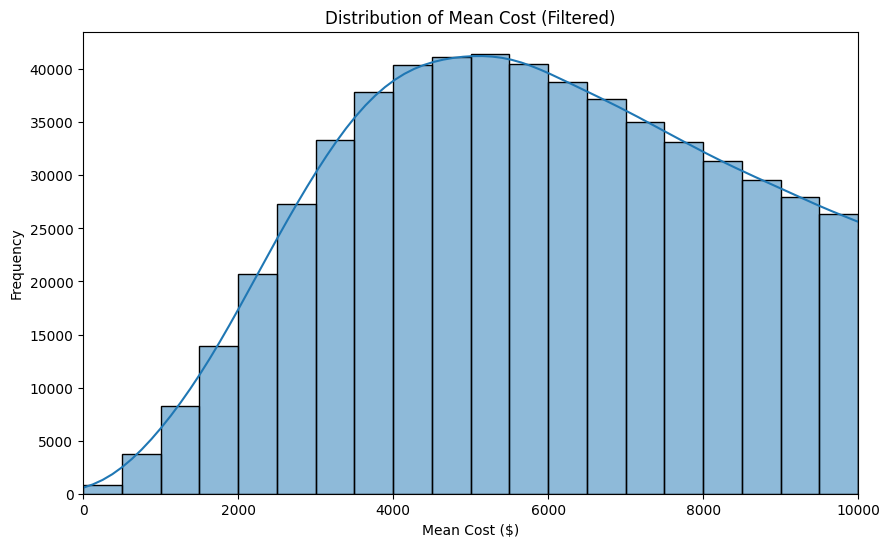

In [13]:
# Removing extremely large mean_cost outliers (say above 25000$)
df_filtered = df[df['mean_cost'] < 25000]

# Now plotting again
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['mean_cost'], bins=50, kde=True)
plt.title('Distribution of Mean Cost (Filtered)')
plt.xlabel('Mean Cost ($)')
plt.ylabel('Frequency')
plt.xlim(0, 10000)
plt.show()


🏥 **Top 15 Hospitals by Average Mean Cost Visualization**

In this step:

We group the dataset (`df_filtered`) by facility name (`facility_name`) and calculate the average mean cost (`mean_cost`) for each hospital.

We then sort the hospitals in descending order and select the top 15 hospitals with the highest average mean cost.

To visualize the results:

We create a horizontal bar plot (`sns.barplot`) with:

X-axis: Average Mean Cost ($)

Y-axis: Hospital Name

We use the 'magma' color palette for a striking visual effect.

This visualization helps identify the hospitals with the **highest average cost per discharge**, giving valuable insights into cost variability across facilities.

<ipython-input-14-7f9a4f5a0aa0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hospitals_cost.values, y=top_hospitals_cost.index, palette='magma')


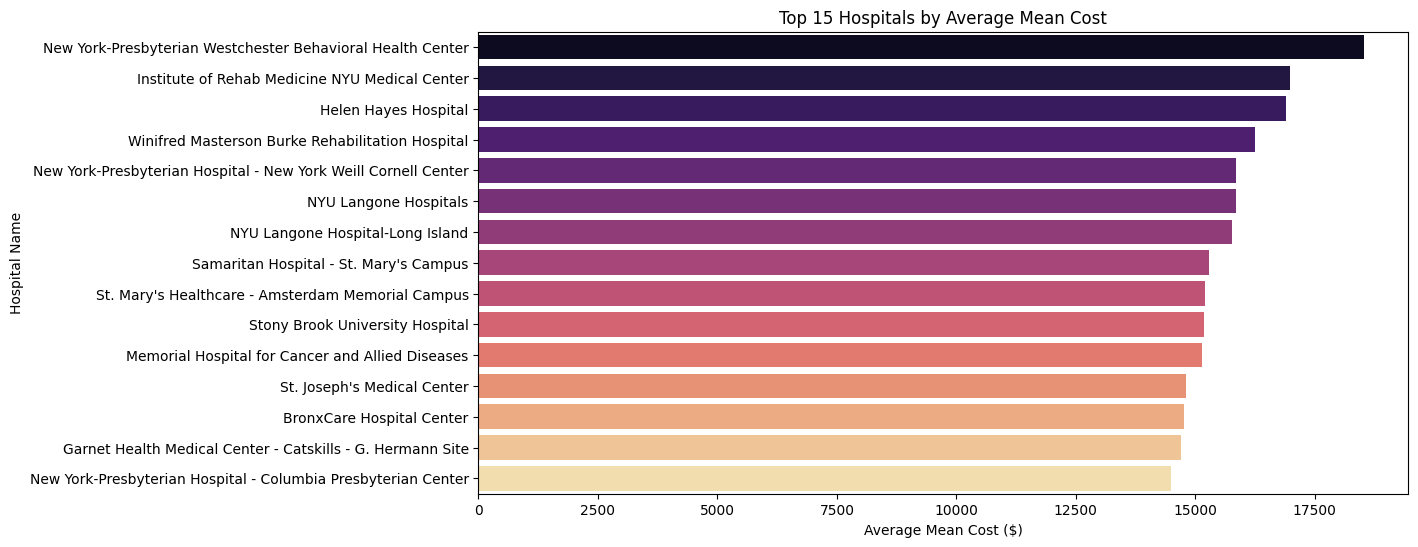

In [14]:
# Top 15 Hospitals by Average Mean Cost
top_hospitals_cost = df_filtered.groupby('facility_name')['mean_cost'].mean().sort_values(ascending=False).head(15)

# Plotting them
plt.figure(figsize=(12,6))
sns.barplot(x=top_hospitals_cost.values, y=top_hospitals_cost.index, palette='magma')
plt.title('Top 15 Hospitals by Average Mean Cost')
plt.xlabel('Average Mean Cost ($)')
plt.ylabel('Hospital Name')
plt.show()


📊 **Boxplot: Mean Cost by Severity of Illness**

In this step:

We create a boxplot (`sns.boxplot`) to explore the relationship between severity of illness (`apr_severity_of_illness_description`) and the mean cost (`mean_cost`).

Key plot settings:

X-axis: Mean Cost ($)

Y-axis: Severity of Illness categories (Minor, Moderate, Major, Extreme)

`showfliers=False`: Hides extreme outliers for a cleaner, more readable plot.

`palette='Set2'`: Applies a soft, visually appealing color palette.

`xlim(0, 20000)`: Limits the X-axis to \$0–\$20,000 to avoid skewing from extreme values.

This visualization helps us **compare how costs vary by illness severity**, offering key insights into resource utilization and cost distribution across patient types.

<ipython-input-15-f6d9c9032512>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


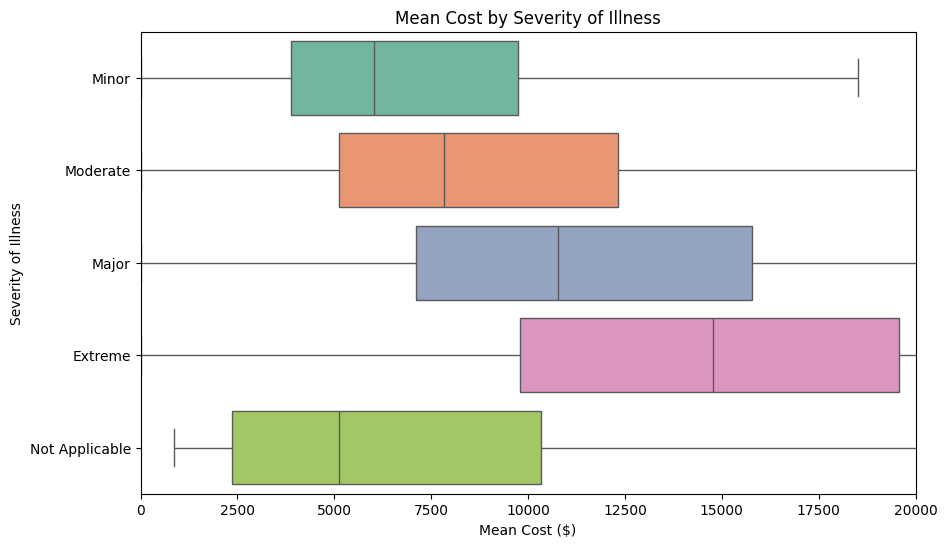

In [15]:
# Boxplot: Severity of Illness vs Mean Cost
plt.figure(figsize=(10,6))
sns.boxplot(
    x='mean_cost',
    y='apr_severity_of_illness_description',
    data=df_filtered,
    palette='Set2',
    showfliers=False # hiding extreme outliers for cleaner plot
)
plt.title('Mean Cost by Severity of Illness')
plt.xlabel('Mean Cost ($)')
plt.ylabel('Severity of Illness')
plt.xlim(0, 20000) # you can adjust if needed
plt.show()

📈 **Line Plot: Trend of Average Mean Cost Over the Years**

In this step:

We group the dataset by `year` and calculate the average mean cost for each year using `groupby` and `mean()`.

We then create a line plot (`sns.lineplot`) to visualize the trend of hospital mean costs over time.

Key plot settings:

X-axis: Years (from the dataset)

Y-axis: Average Mean Cost (in dollars)

Marker: `'o'` adds circles at each yearly point to improve visibility.

Grid: Enabled using `plt.grid(True)` for better readability of trends.

This visualization helps us **observe how average hospital discharge costs have evolved over time**, identifying possible **increases**, **decreases**, or **stable periods**.

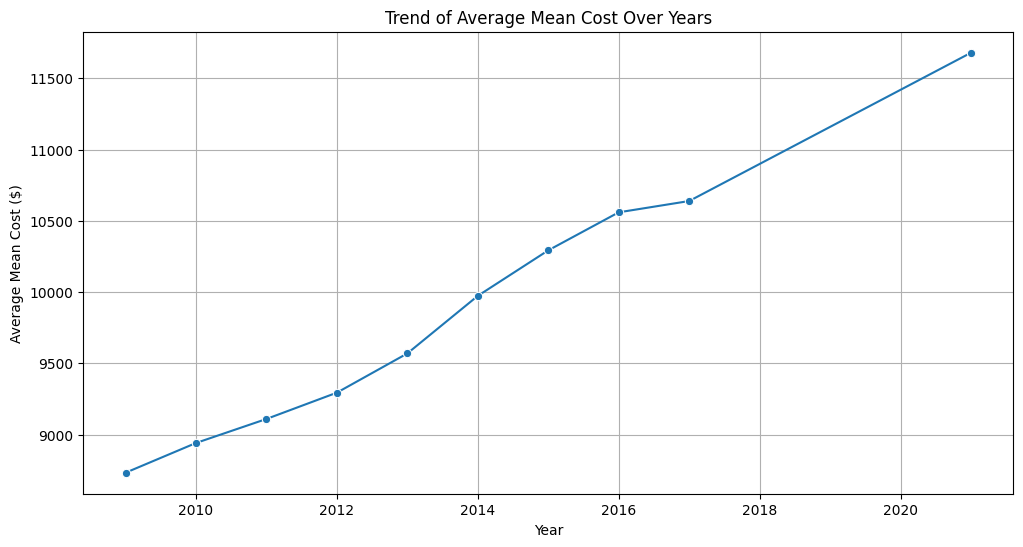

In [16]:
# Grouping data by year and calculate average mean cost
yearly_cost = df_filtered.groupby('year')['mean_cost'].mean()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_cost.index, y=yearly_cost.values, marker='o')
plt.title('Trend of Average Mean Cost Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mean Cost ($)')
plt.grid(True)
plt.show()

⚙️ **Installing the CatBoost Library**

In this step:

We use `!pip install catboost` to install the CatBoost library inside the Colab environment.

CatBoost is a powerful and efficient gradient boosting algorithm developed by Yandex, particularly well-suited for:

Handling categorical features automatically.

Building high-accuracy regression and classification models with minimal tuning.

Since Colab sessions are temporary, it is necessary to reinstall external libraries like CatBoost when starting a new session.

Installing CatBoost ensures we can **build advanced machine learning models** that handle complex datasets efficiently.

In [17]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


🚀 **Final Machine Learning Model: High-Accuracy CatBoost Regressor for Predicting Mean Discharge Cost**

In this major step:

We build a powerful CatBoostRegressor model to predict the mean cost of a hospital discharge.

Feature Selection: We carefully select important features such as:

- Hospital name (`facility_name`)

- Diagnosis code (`apr_drg_code`)

- Severity of illness

- Surgical classification

- Year

- Financial metrics (`mean_charge`, `median_charge`)

Data Preparation:

- Extract selected features.

- Handle missing values with `.dropna()`.

- Define categorical feature indices for automatic handling.

Model Training:

- Split data into 80% training and 20% testing sets.

- Train a CatBoostRegressor with 1200 iterations, 10-depth trees, and optimized learning rate.

Model Evaluation:

- Display Final Train Score and Final Test Score to measure accuracy.

- Calculate the Margin of Error to assess prediction reliability with a 95% confidence interval.

Future Prediction:

- Predict the average mean cost for the year 2025 by updating the 'year' feature.

- Output the final predicted cost based on the full dataset.

This approach ensures a robust, accurate, and interpretable model ready for real-world cost forecasting in healthcare.

In [18]:
# FINAL MODEL: High Accuracy CatBoost Model for Mean Cost Prediction

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

# 1. Select strong features
selected_features = [
    'facility_name',
    'apr_drg_code',
    'apr_severity_of_illness_description',
    'apr_medical_surgical_description',
    'year',
    'mean_charge',
    'median_charge'
]

target_variable = 'mean_cost'  # We are predicting mean cost

# 2. Prepare the data
model_df = df_filtered[selected_features + [target_variable]].dropna()
X = model_df[selected_features]
y = model_df[target_variable]

# 3. Identify categorical features
cat_features = [0, 1, 2, 3, 4]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build and train the model
model = CatBoostRegressor(
    iterations=1200,
    depth=10,
    learning_rate=0.03,
    loss_function='RMSE',
    random_seed=42,
    cat_features=cat_features,
    verbose=100
)

model.fit(X_train, y_train)

# 6. Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"\n Final Train Score: {train_score:.4f}")
print(f" Final Test Score: {test_score:.4f}")

# 7. Margin of Error Calculation
n = len(y_test)
z = 1.96  # 95% confidence interval (standard z-score)
p = test_score

margin_of_error = z * sqrt(p * (1 - p) / n)

print(f" Margin of Error: ±{margin_of_error:.4f}")

# 8. Predict for 2025
X_2025 = X.copy()
X_2025['year'] = 2025

predicted_mean_costs_2025 = model.predict(X_2025)
average_predicted_mean_cost_2025 = predicted_mean_costs_2025.mean()

print(f"\n🎯 Predicted Average Mean Cost for 2025 (Used Full Dataset): ${average_predicted_mean_cost_2025:.2f}")

0:	learn: 5732.3702223	total: 1.76s	remaining: 35m 11s
100:	learn: 1995.0014484	total: 3m 4s	remaining: 33m 26s
200:	learn: 1785.7236051	total: 6m 18s	remaining: 31m 20s
300:	learn: 1720.3619756	total: 9m 27s	remaining: 28m 16s
400:	learn: 1677.1753638	total: 12m 47s	remaining: 25m 30s
500:	learn: 1645.8564443	total: 16m 4s	remaining: 22m 26s
600:	learn: 1619.4117752	total: 19m 14s	remaining: 19m 11s
700:	learn: 1598.0870815	total: 22m 38s	remaining: 16m 6s
800:	learn: 1578.1406421	total: 25m 46s	remaining: 12m 50s
900:	learn: 1561.8924838	total: 28m 45s	remaining: 9m 32s
1000:	learn: 1545.8569849	total: 31m 48s	remaining: 6m 19s
1100:	learn: 1531.3552268	total: 34m 50s	remaining: 3m 7s
1199:	learn: 1518.2128433	total: 37m 48s	remaining: 0us

 Final Train Score: 0.9377
 Final Test Score: 0.9341
 Margin of Error: ±0.0011

🎯 Predicted Average Mean Cost for 2025 (Used Full Dataset): $11106.70
